<a href="https://colab.research.google.com/github/cicily19/LinearRegressionPredictiveModel/blob/main/LinearRegressionPredictiveModels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Definition:
1. You are expected to use the provided Nairobi Office Price Ex dataset with One feature 𝑥
(office size) and one target 𝑦 (office price).
2. Write two python functions one for computing Mean Squared Error to be used as your
Performance Measure Technique and another for Gradient Descent as your learning algorithm
that can update weights (refer to class theory notes on this formulas)
3. Set random initial values for slope (m) and y-intercept (c) and train an intelligent linear
regression model of your dataset for 10 epochs by calling the above functions. Show the error in
every epoch.
4.  Also plot the line of best fit after the final epoch.
5. Use your above learnt line to predict the office price when the size is 100 sq. ft

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('Nairobi Office Price Ex.csv')
data.head()

,LOC,FUR,AMB,PROX_SCH,PROX_ROAD,PROX_MALL,WATER,HK_SER,SIZE,PRICE
0,karen,yes,serene,no,yes,yes,yes,yes,32.502345,31.707006
1,madaraka,yes,semi_serene,yes,yes,yes,no,no,53.426804,68.777596
2,karen,no,noisy,no,yes,yes,yes,yes,61.530358,62.562382
3,karen,yes,semi_serene,no,no,no,yes,yes,47.475640,71.546632
4,buruburu,no,semi_serene,no,yes,yes,yes,yes,59.813208,87.230925


In [ ]:
# Extracting the feature(office size) and the target(office price)
X = data['SIZE'].values
print("Size values: ", X)
Y = data['PRICE'].values
print("Price values: ", Y)

Size values:  [32.50234527 53.42680403 61.53035803 47.47563963 59.81320787 55.14218841
 52.21179669 39.29956669 48.10504169 52.55001444 45.41973014 54.35163488
 44.1640495  58.16847072]
Price values:  [31.70700585 68.77759598 62.5623823  71.54663223 87.23092513 78.21151827
 79.64197305 59.17148932 75.3312423  71.30087989 55.16567715 82.47884676
 62.00892325 75.39287043]


In [ ]:
# mean squared error
def mean_squared_error(y_true, y_predicted):
    return ((y_true - y_predicted) ** 2).mean()

In [ ]:
def gradient_descent(x, y, m, c, learning_rate, epochs):
    n = len(y)
    errors = []

    for epoch in range(epochs):
        y_pred = m * x + c  # Predicted values
        error = mean_squared_error(y, y_pred)  # Calculate MSE
        errors.append(error)

        # Calculate gradients
        m_gradient = (-2/n) * np.dot(x, (y - y_pred))  # Slope gradient
        c_gradient = (-2/n) * np.sum(y - y_pred)      # Intercept gradient

        # Update weights
        m -= learning_rate * m_gradient
        c -= learning_rate * c_gradient

        print(f'Epoch {epoch + 1}, MSE: {error:.4f}, m: {m:.4f}, c: {c:.4f}')

    return m, c, errors

In [ ]:
# Parameters
learning_rate = 0.01
epochs = 10
m_initial = 0  # Random initial value for slope
c_initial = 0  # Random initial value for intercept

# Train the model
m, c, errors = gradient_descent(X, Y, m_initial, c_initial, learning_rate, epochs)


Epoch 1, MSE: 4890.9189, m: 70.6407, c: 1.3722
Epoch 2, MSE: 12442057.8030, m: -3519.9181, c: -68.3437
Epoch 3, MSE: 32144249476.6602, m: 178982.6135, c: 3475.2361
Epoch 4, MSE: 83045667958034.3594, m: -9097337.7740, c: -176639.3948
Epoch 5, MSE: 214551065741643264.0000, m: 462403628.1308, c: 8978307.7387
Epoch 6, MSE: 554299350499270524928.0000, m: -23503258570.0448, c: -456353444.0414
Epoch 7, MSE: 1432049609736699275902976.0000, m: 1194634149684.8728, c: 23195737176.5131
Epoch 8, MSE: 3699744700945183239240155136.0000, m: -60721399428680.6094, c: -1179003314536.9487
Epoch 9, MSE: 9558405490357764632056210391040.0000, m: 3086374476700124.5000, c: 59926908341525.5078
Epoch 10, MSE: 24694437833713425669479967085297664.0000, m: -156875623751294112.0000, c: -3045991728007950.0000


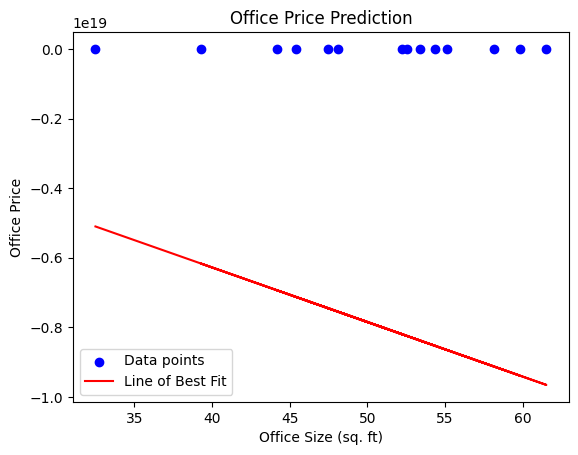

In [ ]:
# Plotting
plt.scatter(X, Y, color='blue', label='Data points')
plt.plot(X, m * X + c, color='red', label='Line of Best Fit')
plt.xlabel('Office Size (sq. ft)')
plt.ylabel('Office Price')
plt.title('Office Price Prediction')
plt.legend()
plt.show()

In [ ]:
# Prediction for 100 sq. ft
size = 100
predicted_price = m * size + c
print(f'The predicted office price for {size} sq. ft is: {predicted_price:.2f}')

The predicted office price for 100 sq. ft is: -15690608366857418752.00
